In [10]:
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("D:\Work\python\dl_clg\datasets\diabetes\diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
y = data['Outcome'].values
x = data.drop(columns=['Outcome']).values

In [ ]:
scaler = StandardScaler()

x = scaler.fit_transform(x)

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=.25)

In [40]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    layers.Dense(128, activation='relu', input_shape=(x.shape[1],)),
    Dropout(0.3),
    layers.Dense(64, activation='relu'),
    Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [41]:
from tensorflow.keras.optimizers import SGD
model.compile(loss='binary_crossentropy' , metrics=['accuracy'] , optimizer='adam')

In [42]:
history =  model.fit(x_train, y_train , epochs=20,batch_size=32,validation_data=(x_test,y_test) , verbose=1)

Epoch 1/20
18/18 [==============================] - 1s 16ms/step - loss: 0.6646 - accuracy: 0.6198 - val_loss: 0.5842 - val_accuracy: 0.7865
Epoch 2/20
18/18 [==============================] - 0s 9ms/step - loss: 0.5691 - accuracy: 0.7465 - val_loss: 0.5126 - val_accuracy: 0.7865
Epoch 3/20
18/18 [==============================] - 0s 9ms/step - loss: 0.5295 - accuracy: 0.7483 - val_loss: 0.4735 - val_accuracy: 0.7917
Epoch 4/20
18/18 [==============================] - 0s 8ms/step - loss: 0.5031 - accuracy: 0.7552 - val_loss: 0.4532 - val_accuracy: 0.7760
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 0.4848 - accuracy: 0.7569 - val_loss: 0.4399 - val_accuracy: 0.7917
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 0.4765 - accuracy: 0.7708 - val_loss: 0.4360 - val_accuracy: 0.7969
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 0.4727 - accuracy: 0.7830 - val_loss: 0.4377 - val_accuracy: 0.7865
Epoch 8/20
18/18 [=

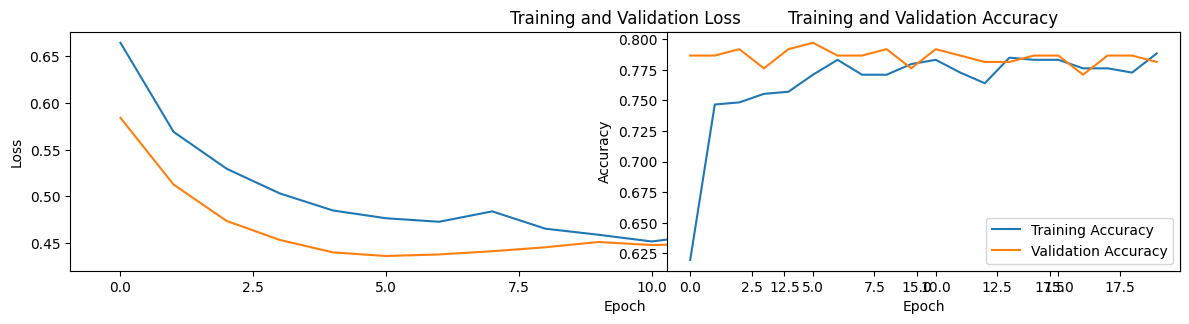

In [45]:
plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()